https://code.likeagirl.io/finding-dominant-colour-on-an-image-b4e075f98097

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
def find_histogram(clt):
    """ create a histogram with k clusters
    :param: clt
    :return: hist """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
#     for 3 clusters the numLabels will be 0, 1, 2, 3
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
#     clt.labels_ is an array which includes cluster label for each pixel
    hist = hist.astype("float")
    hist /= hist.sum() # calculate ratios of histogram values
    return hist

def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX
    # return the bar chart
    return bar

In [8]:
# img = cv2.imread('The_Persistence_of_Memory.jpg') # or,
# img = cv2.imread('Mona_lisa.jpg') # or,
# img = cv2.imread('Starry-Night.jpg') # read as Blue-Green-Red, if (filename, 0) then read as grayscale
# img = cv2.imread('seurat_sunday_afternoon.jpg') # low res image
img = cv2.imread('cezanne_fruit_basket.jpg') # low res image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert channels to R-G-B
# the information is row number X column number X color channel number
# convert the 3-D matrix to 2-D as we do not need row and column
img = img.reshape((img.shape[0] * img.shape[1], 3)) #represent as row*column, color channel number
clt = KMeans(n_clusters=4) # cluster numbers in histogram - ie how many dominant colors
# do you want to see
clt.fit(img)
# At this stage the image processing is all done, now to plot

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

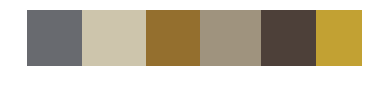

In [9]:
hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)
plt.axis("off")
plt.imshow(bar)
plt.savefig('fruit_basket.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)
plt.show()